# Ordenación de arrays

Hasta este punto nos hemos ocupado principalmente de las herramientas para acceder y operar con datos de arrays con NumPy.
Esta sección cubre los algoritmos relacionados con la ordenación de valores en arrays de NumPy.
Estos algoritmos son un tema favorito en los cursos de introducción a la informática: si alguna vez has tomado uno, probablemente habrás tenido sueños (o, dependiendo de tu temperamento, pesadillas) sobre *ordenamientos de inserción*, *ordenamientos de selección*, *ordenamientos de fusión*, *ordenamientos rápidos*, *ordenamientos de burbuja*, y muchos, muchos más.
Todos son medios para realizar una tarea similar: ordenar los valores de un list o array.

Por ejemplo, una simple *ordenación por selección* encuentra repetidamente el valor mínimo de un list, y hace intercambios hasta que el list está ordenado. Podemos codificar esto en unas pocas líneas de Python:

In [ ]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [ ]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Como cualquier estudiante de primer año de informática le dirá, la ordenación por selección es útil por su simplicidad, pero es demasiado lenta para ser útil para arrays más grandes.
Para un list de $N$ valores, requiere $N$ bucles, cada uno de los cuales hace en orden $\sim N$ comparaciones para encontrar el valor de intercambio.
En términos de la notación "big-O" que se utiliza a menudo para caracterizar estos algoritmos (véase [Notación Big-O](#Aside:-Notación-Big-O)), la ordenación por selección tiene un promedio de $\mathcal{O}[N^2]$: si se duplica el número de elementos del list, el tiempo de ejecución se multiplicará por cuatro aproximadamente.

Incluso la ordenación por selección, sin embargo, es mucho mejor que mis algoritmos de ordenación favoritos de todos los tiempos, el *bogosort*:

In [ ]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [ ]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Este tonto método de ordenación se basa en el puro azar: aplica repetidamente un barajado aleatorio del array hasta que el resultado queda ordenado.
Con un escalado medio de $\mathcal{O}[N \times N!]$, (es decir, *N* $\times$ *N* factorial) esto no debería-obviamente-nunca ser utilizado para ningún cálculo real.

Afortunadamente, Python contiene algoritmos de ordenación incorporados que son *mucho* más eficientes que cualquiera de los algoritmos simplistas que acabamos de mostrar. Empezaremos por ver los algoritmos incorporados en Python, y luego echaremos un vistazo a las rutinas incluidas en NumPy y optimizadas para los arrays de NumPy.

## Ordenación rápida en NumPy: ``np.sort`` y ``np.argsort``

Aunque Python tiene incorporadas las funciones ``sort`` y ``sorted`` para trabajar con lists, no las discutiremos aquí porque la función ``np.sort`` de NumPy resulta ser mucho más eficiente y útil para nuestros propósitos.
Por defecto, ``np.sort`` utiliza un algoritmo de ordenación rápida $\mathcal{O}[N\log N]$, aunque también están disponibles *mergesort* y *heapsort*. Para la mayoría de las aplicaciones, el ordenamiento rápido por defecto es más que suficiente.

Para devolver una versión ordenada del array sin modificar la entrada, se puede utilizar ``np.sort``:

In [ ]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

Si prefieres ordenar el array en su lugar, puedes utilizar el método ``sort`` de los arrays:

In [ ]:
x.sort()
print(x)

[1 2 3 4 5]


Una función relacionada es ``argsort``, que devuelve los *índices* de los elementos ordenados:

In [ ]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


El primer elemento de este resultado da el índice del elemento más pequeño, el segundo valor da el índice del segundo más pequeño, y así sucesivamente.
Estos índices se pueden utilizar (mediante la indexación fancy) para construir el array ordenada si se desea:

In [ ]:
x[i]

array([1, 2, 3, 4, 5])

### Ordenación por filas o columnas

Una característica útil de los algoritmos de ordenación de NumPy es la capacidad de ordenar a lo largo de filas o columnas específicas de un array multidimensional utilizando el argumento ``axis``. Por ejemplo:

In [ ]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [ ]:
# ordenar cada columna de X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [ ]:
# ordenar cada fila de X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Tenga en cuenta que esto trata cada fila o columna como un array independiente, y cualquier relación entre los valores de las filas o columnas se perderá.

## Ordenaciones parciales: Partición

A veces no nos interesa ordenar todo el array, sino que simplemente queremos encontrar los *k* valores más pequeños del array. NumPy proporciona esto en la función ``np.partition``. ``np.partition`` toma un array y un número *K*; el resultado es un nuevo array con los valores *K* más pequeños a la izquierda de la partición, y el resto de valores a la derecha, en un orden arbitrario:

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Obsérvese que los tres primeros valores del array resultante son los tres más pequeños del array, y las restantes posiciones del array contienen los valores restantes.
Dentro de las dos particiones, los elementos tienen un orden arbitrario.

De forma similar a la ordenación, podemos hacer una partición a lo largo de un eje arbitrario de un array multidimensional:

In [ ]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

El resultado es un array en el que las dos primeras ranuras de cada fila contienen los valores más pequeños de esa fila, y el resto de valores llenan las ranuras restantes.

Finalmente, al igual que existe un ``np.argsort`` que calcula los índices de la ordenación, existe un ``np.argpartition`` que calcula los índices de la partición.
Veremos esto en acción en la siguiente sección.

## Ejemplo: k-Nearest Neighbors

Veamos rápidamente cómo podemos utilizar esta función ``argsort`` a lo largo de múltiples ejes para encontrar los vecinos más cercanos de cada punto de un conjunto.
Empezaremos creando un conjunto aleatorio de 10 puntos en un plano bidimensional.
Usando la convención estándar, los organizaremos en un array de $10 \times 2$:

In [ ]:
X = rand.rand(10, 2)

Para hacernos una idea del aspecto de estos puntos, hagamos un rápido gráfico de dispersión:

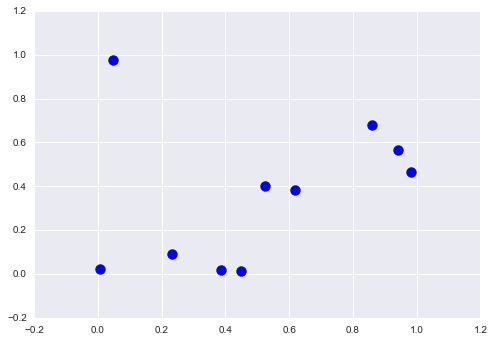

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Ahora calcularemos la distancia entre cada par de puntos.
Recordemos que la distancia al cuadrado entre dos puntos es la suma de las diferencias al cuadrado en cada dimensión;
Utilizando las eficientes rutinas broadcasting ([Computación en arrays: broadcasting](02.05-Computación-en-arrays-broadcasting.ipynb)) y agregación ([Agregaciones: Mín, Máx, y todo lo demás](02.04-Cómputo-en-arrays-agregados.ipynb)) proporcionadas por NumPy podemos calcular el array de distancias cuadradas en una sola línea de código:

In [ ]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

Esta operación tiene mucho contenido, y puede ser un poco confusa si no estás familiarizado con las reglas de emisión de NumPy. Cuando te encuentres con un código como este, puede ser útil dividirlo en los pasos que lo componen:

In [ ]:
# para cada par de puntos, calcular las diferencias de sus coordenadas
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [ ]:
# elevar al cuadrado las diferencias de coordenadas
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [ ]:
# sumar las diferencias de coordenadas para obtener la distancia al cuadrado
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Sólo para comprobar lo que estamos haciendo, debemos ver que la diagonal de este array (es decir, el conjunto de distancias entre cada punto y ella misma) es toda cero:

In [ ]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

¡Se comprueba!
Una vez convertidas las distancias cuadradas por pares, podemos utilizar ``np.argsort`` para ordenar cada fila. Las columnas más a la izquierda darán los índices de los vecinos más cercanos:

In [ ]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Observe que la primera columna da los números del 0 al 9 en orden: esto se debe a que el vecino más cercano de cada punto es él mismo, como cabría esperar.

Al utilizar una ordenación completa, hemos hecho más trabajo del necesario en este caso. Si simplemente estamos interesados en los vecinos más cercanos $k$, todo lo que necesitamos es dividir cada fila para que las distancias cuadradas más pequeñas $k + 1$ vengan primero, con distancias más grandes llenando las posiciones restantes del array. Podemos hacer esto con la función ``np.argpartition``:

In [ ]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

Para visualizar esta red de vecinos, vamos a trazar rápidamente los puntos junto con las líneas que representan las conexiones de cada punto con sus dos vecinos más cercanos:

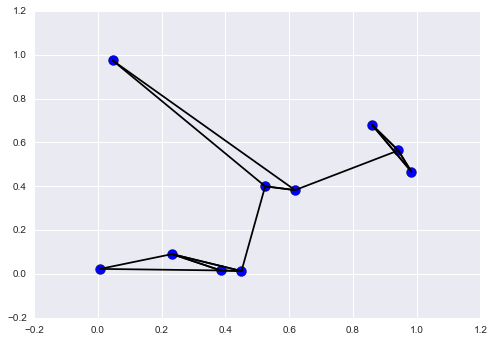

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# dibujar líneas desde cada punto hasta sus dos vecinos más cercanos
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # trazar una línea desde X[i] hasta X[j]
        # utiliza un poco de magia de zip para hacerlo:
        plt.plot(*zip(X[j], X[i]), color='black')

Cada punto del gráfico tiene líneas dibujadas hacia sus dos vecinos más cercanos.
A primera vista, puede parecer extraño que algunos de los puntos tengan más de dos líneas saliendo de ellos: esto se debe a que si el punto A es uno de los dos vecinos más cercanos del punto B, esto no implica necesariamente que el punto B sea uno de los dos vecinos más cercanos del punto A.

Aunque el broadcasting y la ordenación por filas de este enfoque puede parecer menos sencillo que escribir un bucle, resulta ser una forma muy eficiente de operar con estos datos en Python.
Podrías tener la tentación de hacer el mismo tipo de operación recorriendo manualmente los datos y ordenando cada conjunto de vecinos individualmente, pero esto llevaría casi con toda seguridad a un algoritmo más lento que la versión vectorizada que hemos utilizado. La belleza de este enfoque es que está escrito de una manera que es agnóstica al tamaño de los datos de entrada: podríamos calcular fácilmente los vecinos entre 100 o 1.000.000 puntos en cualquier número de dimensiones, y el código sería el mismo.

Por último, voy a señalar que al hacer muy grandes búsquedas de vecinos más cercanos, hay árbol basado y / o algoritmos aproximados que pueden escalar como $\mathcal{O}[N\log N]$ o mejor en lugar de la $\mathcal{O}[N^2]$ del algoritmo de fuerza bruta. Un ejemplo de esto es el KD-Tree, [implementado en Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).vvvv

## Aside: Notación Big-O

La notación Big-O es un medio para describir cómo el número de operaciones requeridas por un algoritmo escala a medida que la entrada crece en tamaño.
Utilizarla correctamente es sumergirse en el ámbito de la teoría de la informática y distinguirla cuidadosamente de la notación small-o, la notación big-$\theta$, la notación big-$\Omega$ y probablemente muchos híbridos mutantes de las mismas.
Aunque estas distinciones añaden precisión a las afirmaciones sobre el escalado algorítmico, fuera de los exámenes de teoría de la informática y de los comentarios de los blogueros pedantes, rara vez se verán estas distinciones en la práctica.
En el mundo de la ciencia de los datos es mucho más común un uso menos rígido de la notación big-O: como una descripción general (aunque imprecisa) del escalado de un algoritmo.
Con perdón de los teóricos y los pedantes, ésta es la interpretación que utilizaremos a lo largo de este libro.

La notación Big-O, en este sentido amplio, le indica cuánto tiempo tardará su algoritmo a medida que aumenta la cantidad de datos.
Si usted tiene un algoritmo $\mathcal{O}[N]$ (léase "orden $N$) que toma 1 segundo para operar en un list de longitud *N*=1.000, entonces usted debe esperar que tome aproximadamente 5 segundos para un list de longitud *N*=5.000.
Si se tiene un algoritmo $\mathcal{O}[N^2]$ (léase "orden *N* al cuadrado") que tarda 1 segundo para *N*=1000, entonces se debe esperar que tarde unos 25 segundos para *N*=5000.

Para nuestros fines, el *N* suele indicar algún aspecto del tamaño del conjunto de datos (el número de puntos, el número de dimensiones, etc.). Cuando se trata de analizar miles de millones o billones de muestras, la diferencia entre $\mathcal{O}[N]$ y $\mathcal{O}[N^2]$ puede estar lejos de ser trivial.

Tenga en cuenta que la notación big-O por sí misma no le dice nada sobre el tiempo real del reloj de pared de un cálculo, sino sólo sobre su escala a medida que cambia *N*.
Generalmente, por ejemplo, se considera que un algoritmo $\mathcal{O}[N]$ tiene un mejor escalado que un algoritmo $\mathcal{O}[N^2]$, y con razón. Pero para conjuntos de datos pequeños en particular, el algoritmo con mejor escalamiento podría no ser más rápido.
Por ejemplo, en un problema dado, un algoritmo $\mathcal{O}[N^2]$ puede tardar 0,01 segundos, mientras que un algoritmo $\mathcal{O}[N]$ "mejor" puede tardar 1 segundo.
Sin embargo, si se aumenta *N* por un factor de 1.000, el algoritmo $\mathcal{O}[N]$ ganará.

Incluso esta versión suelta de la notación Big-O puede ser muy útil cuando se compara el rendimiento de los algoritmos, y vamos a utilizar esta notación en todo el libro cuando se habla de cómo los algoritmos de escala.